<a href="https://colab.research.google.com/github/lzeng11bc/MLProjectsSKLearn/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models
##### Training Linear Regression Models
* ***Closed Form Equation***
  * **Directly computes the model parameters that best fit the model to the training set(i.e., the model parameters that minimize the cost function over the training set.)**
* ***Gradient Descent(GD)***
  * **Gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method**


## Linear Regression
* **A linear model makes a prediction ny simply computing a weighted sum of the input features, plus a constant called the *bias term*(also called an *intercept term*)**

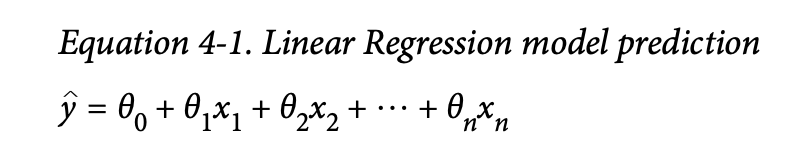

* $\hat{y}$ is tghe predicted value
* $n$ is the number of features
* $x_i$ is the $i^{th}$ feature value
* $\theta_{j}$ is the $j^{th}$ model parameter(including the bias term $\theta_{0}$ iand the feature weights, $\theta_1, \theta_2, \dots,  \theta_n$)

* **This can be written much more concisely using a vectorized form**

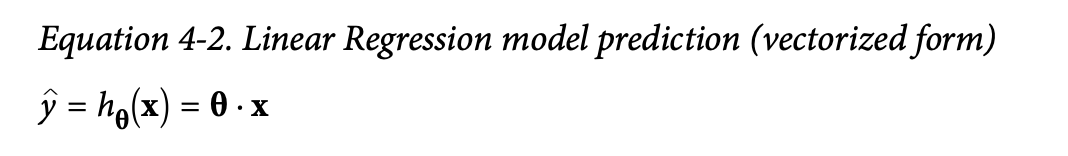

* $\pmb{\theta}$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$
* $\pmb{x}$ is the instance's *feature vector*, containg $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $h_{\theta}$ is the hypothesis function, using the model parameters $\pmb{\theta}$

##### Training Linear Regression
* **To train a linear regression model, you need to find the valye of $\pmb{\theta}$ that minimizes the RMSE**
* **The MSE of a Linear Regression hypothesis $h_{\theta}$ on a training set $\pmb{X}$ is calculated using**

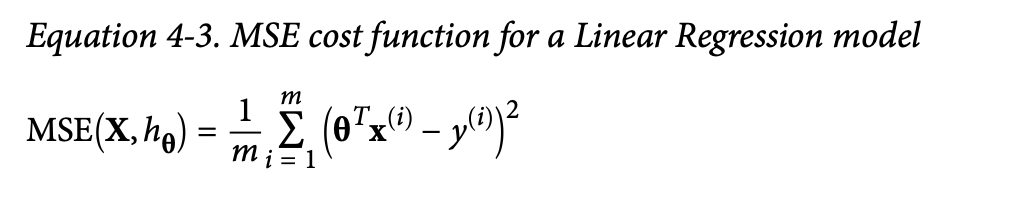

## The Normal Equation
* **To find the value of $\pmb{\theta}$ that minimizes the cost function, there is a *closed-form solution*, in other words, a mathematic equation that gives the result directly. This is called the *Normal Equation***

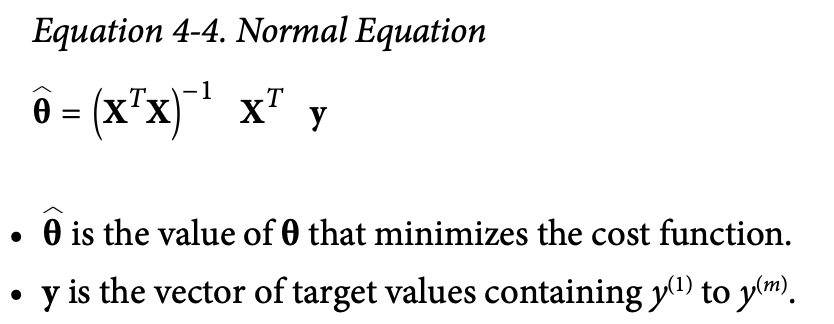

**Generate some liner-looking data to test this equation.**

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

* **Now let's compute $\hat{\pmb{\theta}}$ using the Nornal Equation**
* **We will use the** inv( ) **function from Numpy's Linear Algebra module to compute the inverse of a matrix, and the** dot( ) **method for matrix multiplication**

In [2]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.08017383],
       [2.87827805]])

* **Now we can make predictions using $\hat{\pmb{\theta}}$:**

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08017383],
       [9.83672993]])

* **Let's plot the model's predictions**

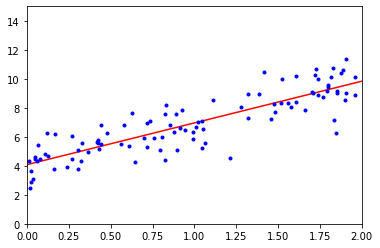

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

* **Perfroming linear regression using Scikit-Learn is quite simple**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.08017383]), array([[2.87827805]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.08017383],
       [9.83672993]])

* **The** LinearRegression **class is based on the** scipy.linalg.lstsq( ) **function(the name stands for "*least squares*"), which you could call directly**

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08017383],
       [2.87827805]])

* **The** scipy.linalg.lstsq( ) **function computes** $\hat{\theta} = \pmb{X}^+ \pmb{y}$, **where $\pmb{X}^+$ is the *pseudoinverse* of $\pmb{X}$(specifically the Moore-Penrose inverse**
  * **You can use** no.linalg.pinv( ) **to compute the pseudoinverse directly**

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.08017383],
       [2.87827805]])

* **The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Vlaue Decompostion*(SVD) that can decompose the training set matrix $\pmb{X}$ intot he matrix multiplicatipn of three matrics $\pmb{U} \quad \pmb{\Sigma} \quad \pmb{U^T}$**

### Computational Complexity
* **The Normal Equation computes the inverse of $\pmb{X}^T \pmb{X}$, which is an $(n + 1) \times (n + 1)$ matrix(where n is the number of features**
* **The *computational complexity* of inverting such a matrix is typically $O(n^{2.4})$ to $O(n^3)$**
* **Once you have trained your Linear Regression model, predictions are very fast: the computational complexity is linear with regards to both the numbr of instances you want to make predictions on and the number of features**

## Gradient Descent
* **The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the cost function**
* **It measures the local gradient of the error fucntion with regards to the parameter $\pmb{\theta}$, and it goes in the direction of the descending gradient.**
  * **once the gradient is zero, you bave reached a minimum**
* **Concretely, you start by filling $\pmb{\theta}$ with random values(this is called *random initialization*), and then you improve it gradually, taking one step at a tiome, each step attempting to decrease the cost function(e.g., the MSE), until the algorithm *converges* to a minimum**

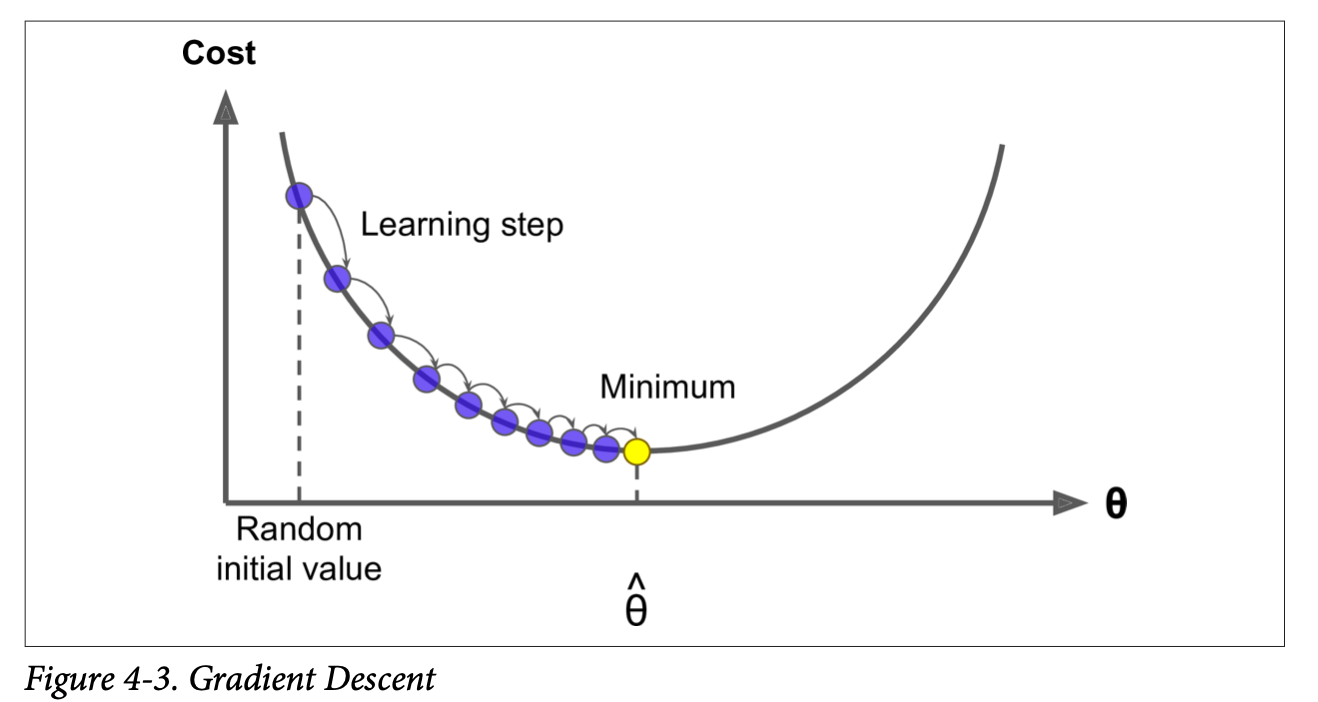

* **An important parameter in Gradient Descent is the size of the steps, determined by *learning rate* hyperparameter.**
  * **If the learing rate is too small, then the algorithm will have to go through many iterations to converg, which will take a long time**
  * **On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher than you were before. This might make the algorithm diverge, with larger and larger values.**

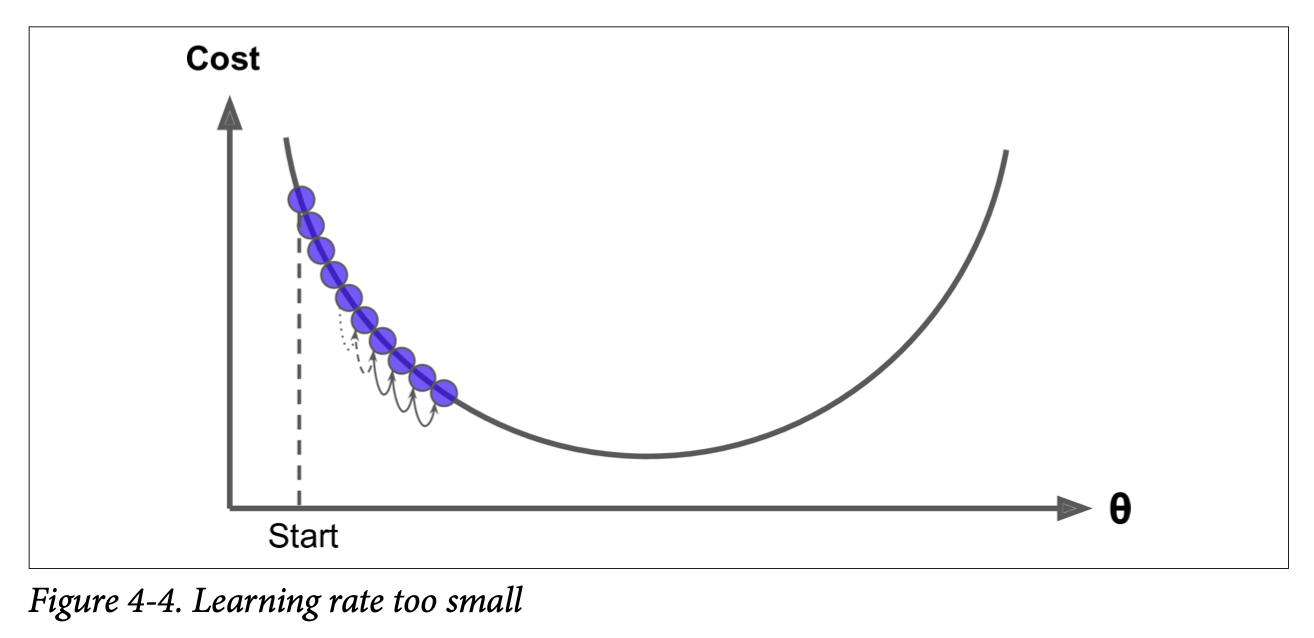

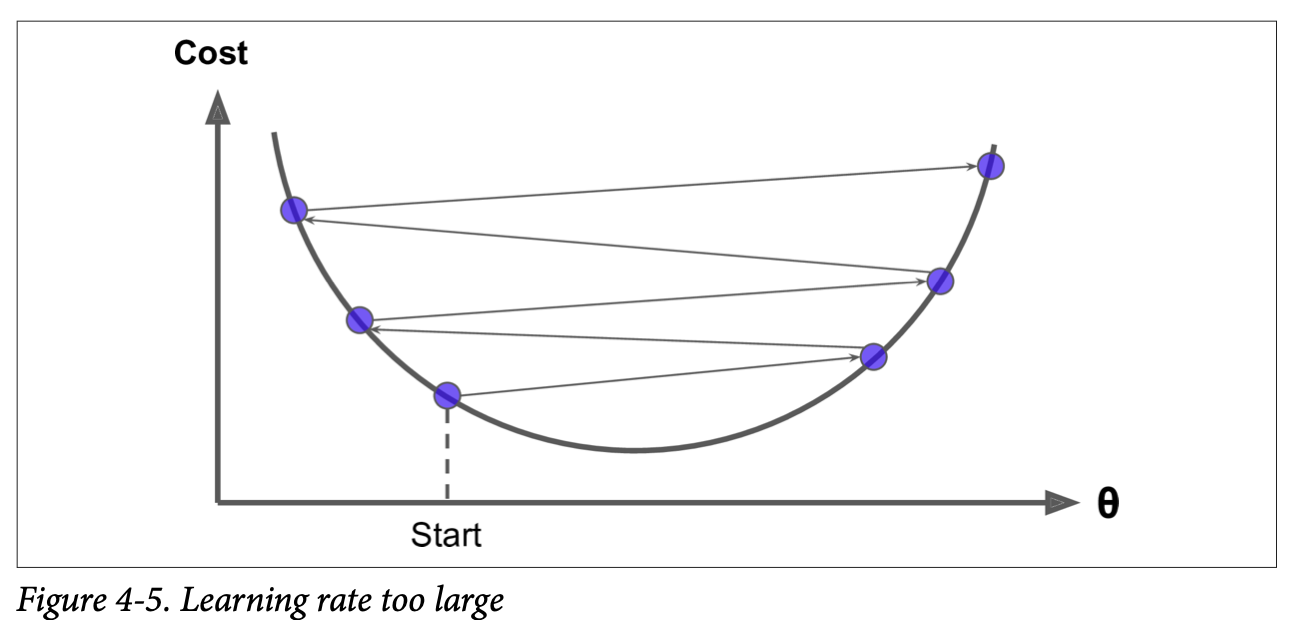

##### Two Main Challenges with Gradient Descent


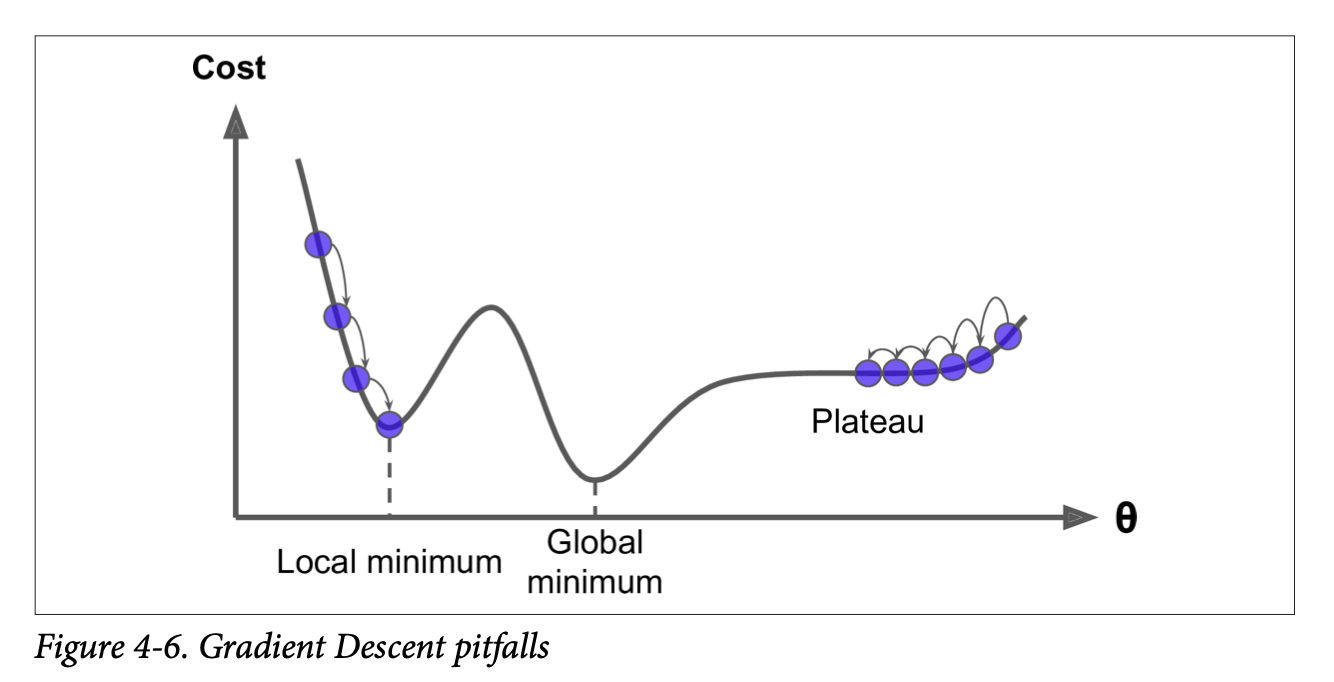

* **If the radom initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as a *global minimum***
* **If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum**
* **MSE cost function for a Linear Regression model happens to a *convex function*, which means that if you pick any two poindt on the curve, the line segment joining them never cross the curve.**
  * **This implies that there are no local minima, just one global minimum**
  * **It is also a continuos function with a slope that never changes abruptly**
  * **Gradient Descent is guaranteed to approach arbitrarily close the global minimum.**

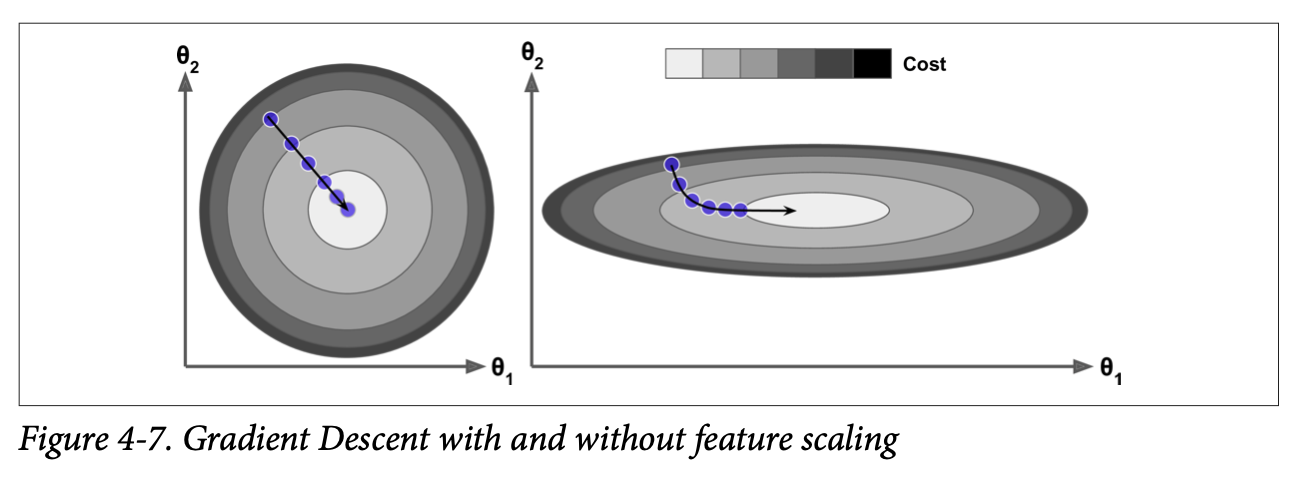

* **The cost fucntion has the shape of a bowel, but it can be an elongated bowl if the features have very different scales**

##### Training
* **This diagram illstrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function(over the training set)**
  * **It is a search in the model's *parameter space*: the more parameters a model has, the more dimensions this space has, and the harder the search is**

### Batch Gradient Descent
* **To implenet Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_{j}$.**
  * ***partial derivative*: You need to calculate how much the cost function will change if you change $\theta_j$ justa bit**
* **Equation computes the partial derivative of the cost function with regards to parameter $\theta_j$, noted $\frac{\partial}{\partial \theta_j}MSE(\pmb{\theta})$**
$$\frac{\partial}{\partial \theta_j}MSE(\pmb{\theta}) = \frac{2}{m} (\pmb{\theta}^{T} \pmb{x}^{(i)} - y^{(i)}) x_j^{(i)}$$

* **Instead of computing these partial derivatives individuallhy, you can compute them all in one go**

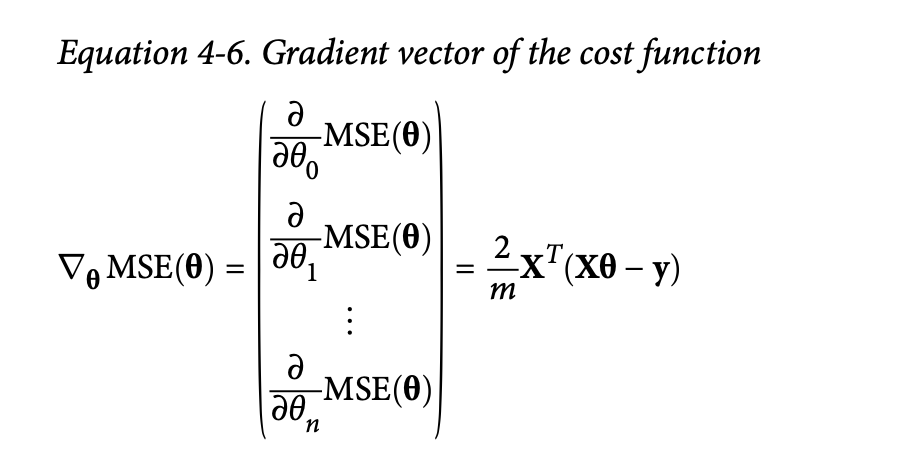

* **Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill.**
  * **This means subtracting $\nabla MSE(\pmb{\theta})$ from $\theta$. This is where the lear ing rate $\eta$ copmes into play: multiplying the gradient vector by $\eta$ determin the size of the downhill step**


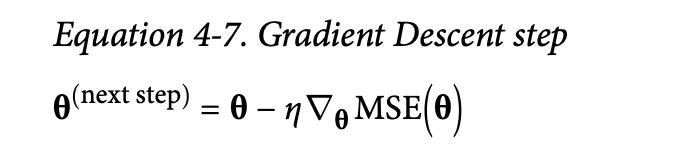

* **Let's look at a quick implementation of this algorithm**

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #radom initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.08017383],
       [2.87827805]])

**Following figure shows the first 10 stpes of Gradient Descent using three different learning rtes(the dashed line represents the starting point)**

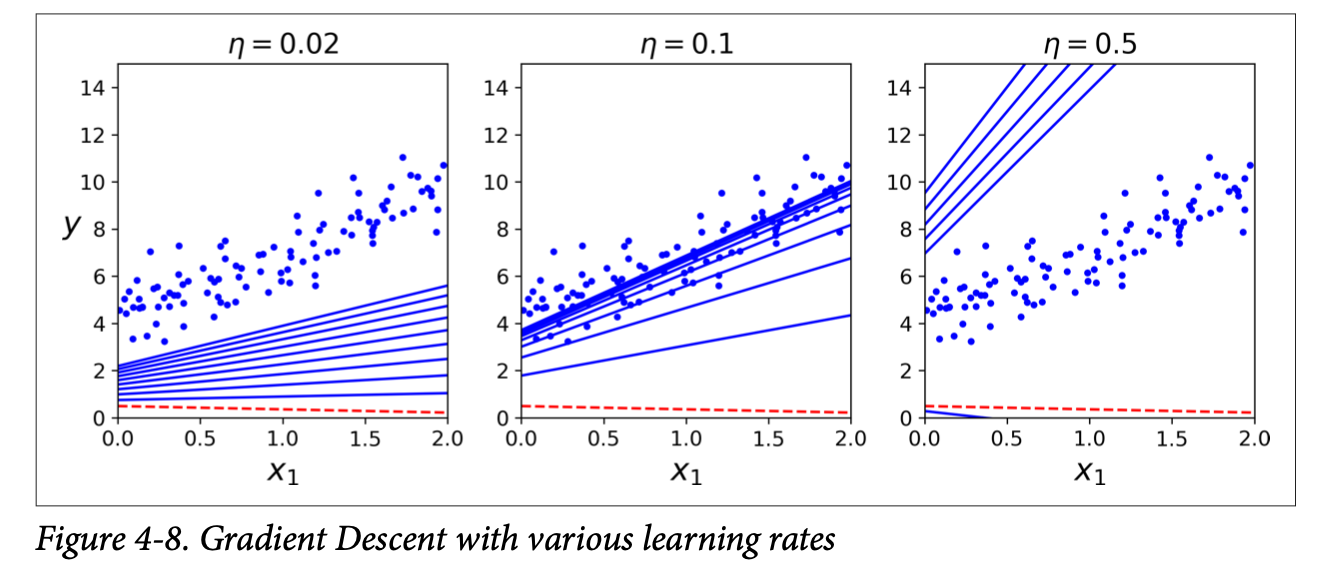

* **On the left, the leraning rate is too low: the algorithm will eventually reach the solution, but it will take a long time.**
* **In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.**
* **On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting futher and further away from the solution at every step.**

##### Convergence Rate
* **When the cost function is convex and its slope does not change abruptly(as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(\frac{1}{\epsilon}))$ iterations to reach the optimum within a range of $\epsilon$ depending on the shape of the cost function.**


### Stoachstic Gradient Descent
* **The main problem with Batch Gradient Descent is the fact that it uses the whole training set to ciompute the gradients at every step, which makes it very slow when the training set is large.**
* **At the opposite extreme, *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based only on that single instance**

###### Advantage
* **This makes the it possible to train on huge training sets, since only one instance needs to be in memory at each iterations

##### Disadvantage
* **Due to its stochastic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on avergae.**
* **Over time it will end up every close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.**

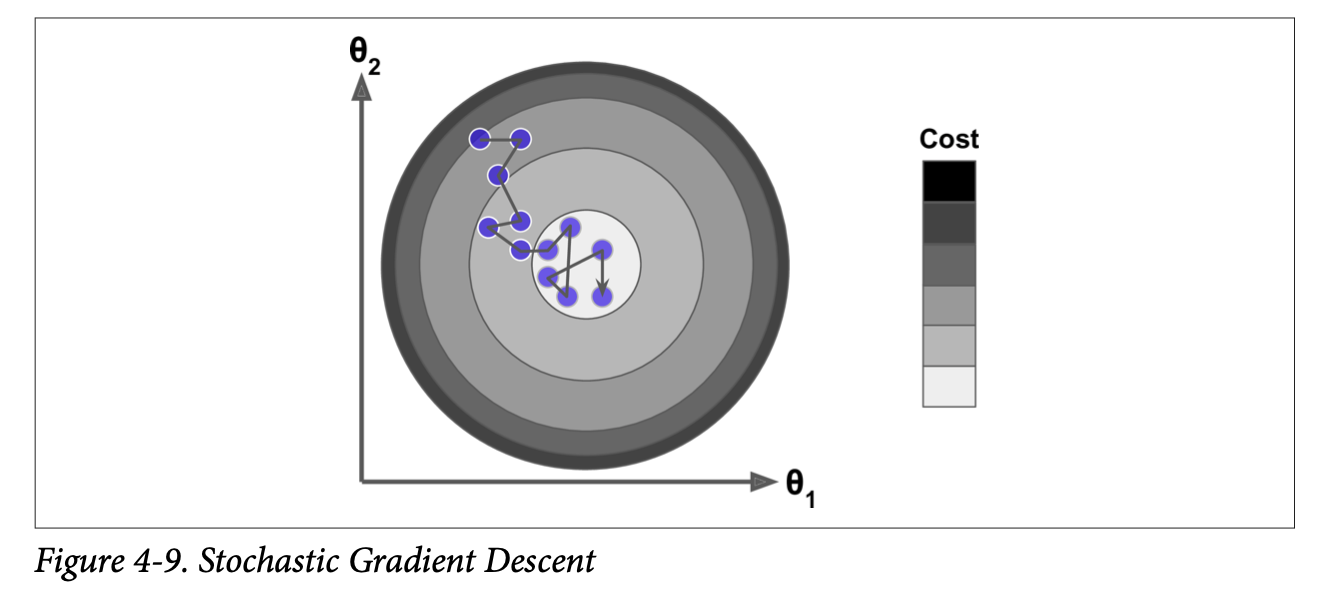

**Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum.**
  * **One solution to this is to gradually reduce the learning rate. The steps start out large, then get smaller and smaller, allowing the algorithm to settle at the global minimum**
* **The function that determines the learning rate at each iteration is called the *learning schedule*.**
  * **If the leraning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum.**
  * **If the learning rate is reduced too slowly, you may jump around the minimum for a long time and  end up with suboptimial solution if you halt training too early.**

**Implements Stochastic Gradient Descent using a simple learning schedule**1

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # radnom initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

* **By convention we iterate by rounds of *m* iterations;each round is called an *epoch***
* **While the Batch Gradient Descent goes through the whole training set, this code goes through the trianing set only 50 time and reaches a farily good solution**


In [ ]:
theta

array([[4.072253 ],
       [2.8818772]])

**Following figure shows the first 20 steps of training**

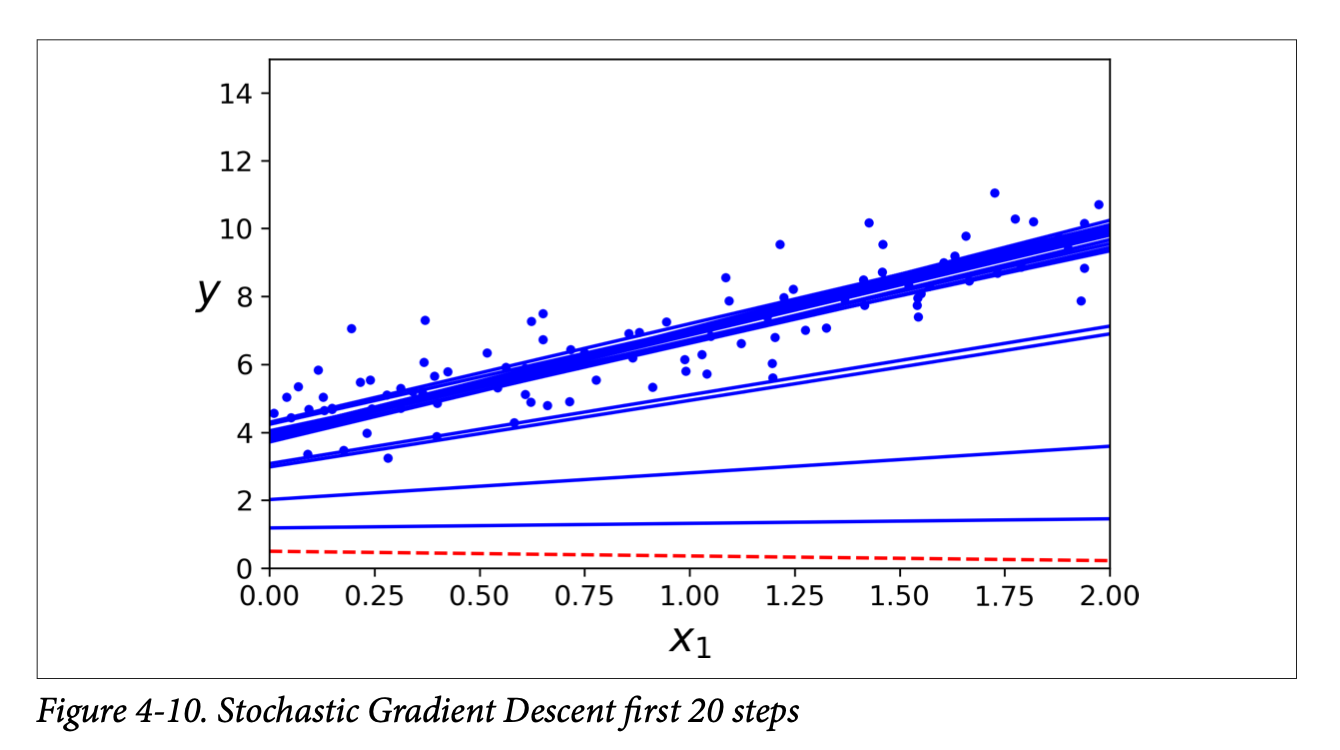

* **Note that since instance may be picked several times per epoch while others may not be picked at all.**

* **TO perform linear regression using SGD with Scikit-Learn, you can use the** SGDRegressor **class, which defaults to optimizing the squared error cost function**<br>

**The following code runs for maximum 1000 epochs(** max\_iter=1000 **)or until the loss drops by less than** 1e-3 **during one epoch(** tol=1e-3 **), starting with a learning rate of** 0.1 (eta=0.1)

In [3]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [4]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89670253]), array([2.81985405]))

### Mini-batch Gradient Descent
* **At each step, instead of computing the gradients ased on the full training set(as in Batch GD) or based on just one instance(as in stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called *Mini-batches***

##### Advantages
* **The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs**


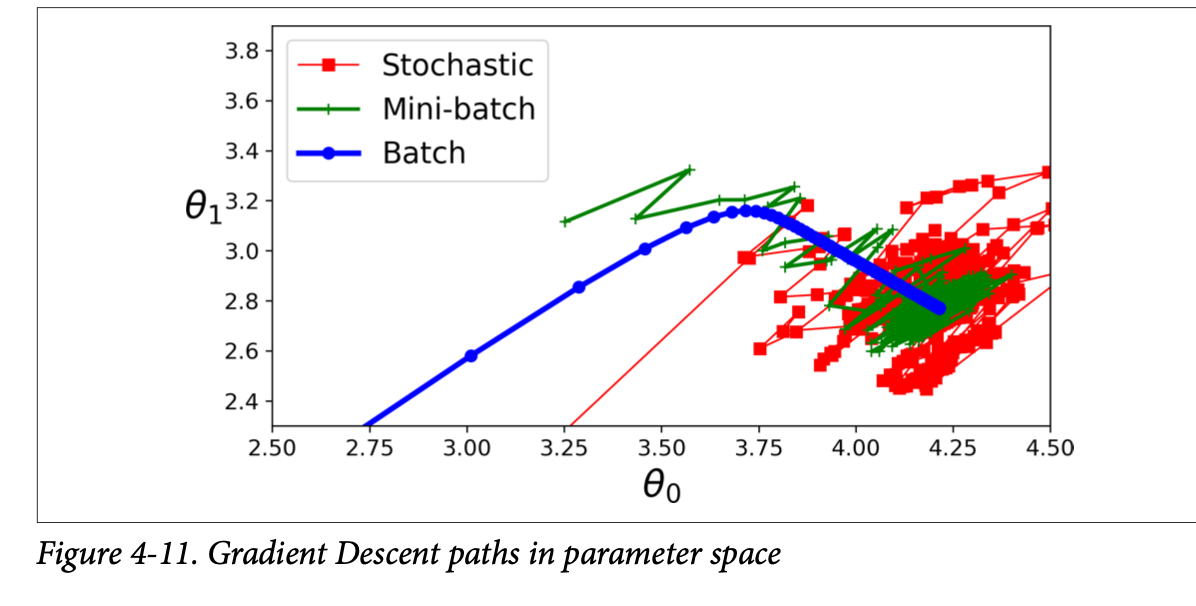

* **The algorithm's progress in parameter space is less erratic with SGD, especially with a fairly large number of mini-batches.**
    * **As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SG.**
    * **On the other hand, it may be harder for it to escape from local minimum.**


**A quick comparison for the algorithms we've discusees so far for Linear Regression**

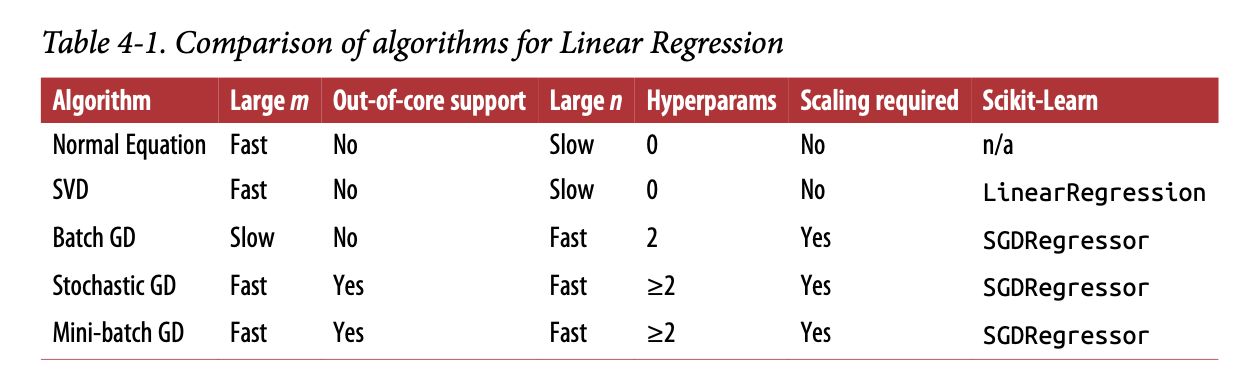

## Polynomial Regression
* **You can actually use a linear model to fit nonlinear data.**
* **A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.**
    * **This technique is called *Polynomial Regression***

**A quick example**

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

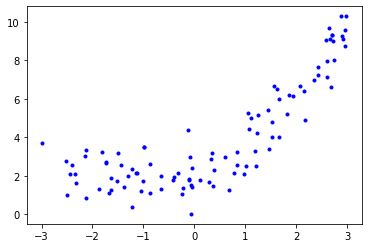

In [9]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

* **A straight line will never fit this data properly. We can use SK-Learn's** PolynomialFeatures **class to transform our training data, adding the sqaure($2^{nd}$ degree polynomial) of each feature in the training set as new features**

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.4963914])

In [11]:
X_poly[0]

array([-1.4963914 ,  2.23918723])

X\_poly **now contains the original feature of** X **plus the square of this feature**<br>
**Now you can fit a** LinearRegression **model to this extended training data**

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10040672]), array([[1.00183425, 0.5092996 ]]))

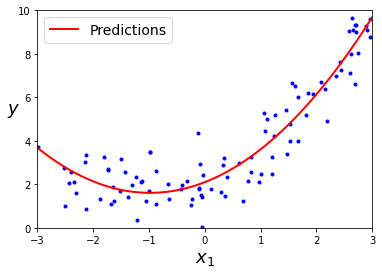

In [15]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

* **Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features(which s something a plain Linear Regression model cannot do)**
    * **This is made possible by the fact that** PolynomialFeatrues **also adds all combinations of features up to the given degree.**
* PolynomialFeatures(degree=d) **transforms an array containing *n* features into an array containing $\frac{(n+d)!}{d!n!}$ features, where $n!$ is the *factorial* of n, equal to 1 x 2 x 3 x $\dots$ n.**

### Learning Curves
* **Another way is to look at the *learning curves*: these are plots of the model's performance on the training set and the vaidation set as a function of the training set size(or the trianing iteration).**
* **To generate the plots, simply train the model several times on different sized subsets of the training set**

**The following code defines a function that plots the learning curves of a model given some training data**

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)

**We can look at the learning curves of the plain Linear Regression model**

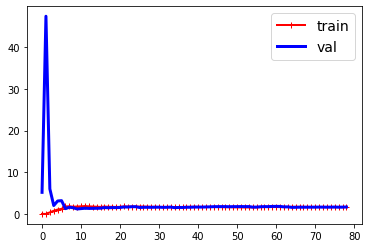

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* **When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero.**
* **As new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, bot becuase the data is noisy and because realtion is not linear, so the error on the training set goes up until it reaches a plaueau, at which point adding new instances to the training set doesn't make the average error much better or wose.**
* **Let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is intially quite big.**
    * **As the model is shown more training examples, it learns and thus validation error slowly goes down.**
    * **A straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve**

**Let's look at the learning curves of a $10^{th}$-dgree polynomial model on the same data:**

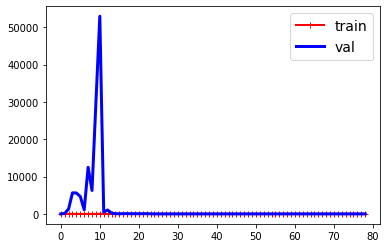

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

**The learning curves are different from the previous ones**<br>
* **The error on the training set is much lower than with the Linear Regression**
* **There is a gap between the curves. This means that the model performs significantly better on the training set than on the valdation data, which is the hallmark of an overfitting model.**
    * **If you used a much larger training set, the two curves would continue to get closer**


##### The Bias/Variance Tradeoff
* **An important theorectical result of statistics and Machine Learning is the fact that a model's generalizatio error can be expressed as the sum of three very different errors:**
* ***Bias***:
    * **This is the generalization error due to wrong assumptions, such as assuming that the data is linear when it is actually quadracti. A high-bias model is most likely to underfit the data**
* **Variance***:
    * **This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom is likely to have high variance, and thus to overfit the training data**
* ***Irreducible error***:
    * **This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data.**